In [1]:
import numpy as np

path = '/home/ornela/PYTHON/'
# path = '/home/omarioni/'

M31_gd  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/M31_pos-mass.dat')
x_M31gd = M31_gd[:,0]
y_M31gd = M31_gd[:,1]
z_M31gd = M31_gd[:,2]
m_M31gd = M31_gd[:,3]

#-----------------------------------------------------------------------------
M31_gs  = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/M31_pos-mass.dat')
x_M31gs = M31_gs[:,0]
y_M31gs = M31_gs[:,1]
z_M31gs = M31_gs[:,2]
m_M31gs = M31_gs[:,3]

MW_gs  = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_pos-mass.dat')
x_MWgs = MW_gs[:,0]
y_MWgs = MW_gs[:,1]
z_MWgs = MW_gs[:,2]
m_MWgs = MW_gs[:,3]


In [2]:
import numpy as np
data = np.loadtxt('../_data/correcciones/lbar_time_GD3.dat')
lbar1_M31gd = data[0,1]
lbar3_M31gd = data[0,3]
lbar5_M31gd = data[0,5]
lbar6_M31gd = data[0,6]

In [3]:
import numpy as np
data = np.loadtxt('../_data/correcciones/lbar_time_GS3_001.dat')
lbar1_M31gs = data[0,1]
lbar3_M31gs = data[0,3]
lbar5_M31gs = data[0,5]
lbar6_M31gs = data[0,6]

In [4]:
import numpy as np
data = np.loadtxt('../_data/correcciones/lbar_time_GS3_001.dat')
lbar1_M31gs = data[0,1]
lbar3_M31gs = data[0,3]
lbar5_M31gs = data[0,5]
lbar6_M31gs = data[0,6]

In [5]:
rl=5   
corte1,=np.where((x_M31gd <rl) & (y_M31gd <rl) & (z_M31gd <rl) & (x_M31gd >-rl) & (y_M31gd >-rl) & (z_M31gd >-rl))

corte4,=np.where((x_M31gs <rl) & (y_M31gs <rl) & (z_M31gs <rl) & (x_M31gs >-rl) & (y_M31gs >-rl) & (z_M31gs >-rl))
corte5,=np.where((x_MWgs <rl) & (y_MWgs <rl) & (z_MWgs <rl) & (x_MWgs >-rl) & (y_MWgs >-rl) & (z_MWgs >-rl))

#-----rango que tiene la escala  de colores-----
vmin=2
vmax=5.7

# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='inferno'

nb1 = 150

npixel = 1000

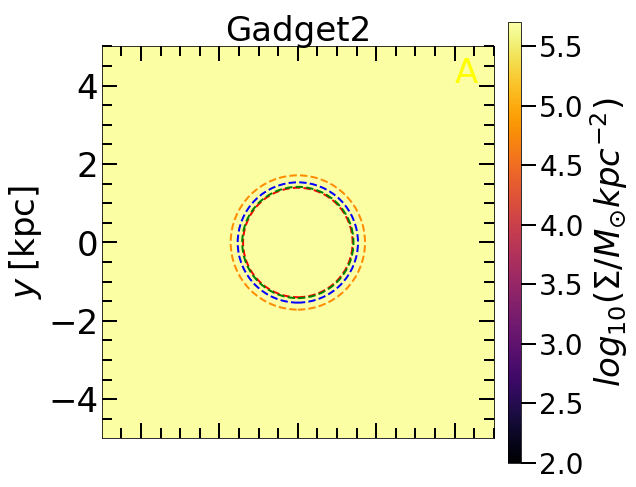

In [8]:
import matplotlib.pyplot as plt
import sphviewer as sph
import matplotlib.patches as patches
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[2,5]})
fig.subplots_adjust(bottom=0.06, left =0.1, right = 0.93, top = 0.96, wspace=0., hspace= -0.22)

particles=sph.Particles(M31_gd[corte1,:3],m_M31gd[corte1]*1e10,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

hb0=ax.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)

cbar0 = fig.colorbar(hb0,ax=ax, orientation='vertical',shrink=0.85,pad=0.03,aspect=35)
cbar0.set_label('$log_{10}(\Sigma /M_{\odot} kpc^{-2})$',fontsize=34)
cbar0.ax.tick_params(labelsize=28)
cbar0.ax.tick_params(length=15, width=2, which='major')

circ1 = patches.Circle((0., 0.), lbar1_M31gd, fc='None',ec='r',ls='--',lw=2,zorder=10)
circ2 = patches.Circle((0., 0.), lbar5_M31gd, fc='None',ec='g',ls='--',lw=2,zorder=10)
circ3 = patches.Circle((0., 0.), lbar3_M31gd, fc='None',ec='b',ls='--',lw=2,zorder=10)
circ4 = patches.Circle((0., 0.), lbar6_M31gd, fc='None',ec='darkorange',ls='--',lw=2,zorder=10)
ax.add_patch(circ1)
ax.add_patch(circ2)
ax.add_patch(circ3)
ax.add_patch(circ4)

ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_xticks([-4,-2,0,2,4])
ax.set_yticks([-4,-2,0,2,4])
ax.set_xticklabels([])
ax.set_ylabel('$y\:\mathrm{[kpc]}$', fontsize=34)
ax.minorticks_on()
ax.tick_params( labelsize=34)
ax.tick_params('both', length=10, width=2, which='minor', direction='in', right=True,top=True)
ax.tick_params('both', length=15, width=2, which='major', direction='in', right=True,top=True)
# ax[0,0].plot(0,0,'k+', markersize=20, color='k')
ax.text(4.3, 4.3,'A', fontsize=34, color='yellow', ha='center', va='center') 
ax.set_title('Gadget2', loc='center', fontsize=34)

plt.show()

In [ ]:
import matplotlib.patches as patches
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8), sharex=True)
# fig.subplots_adjust(bottom=0.06, left =0.1, right = 0.93, top = 0.96, wspace=0., hspace= 0.)

ax.plot(xn[np.where(rstr<3.)],yn[np.where(rstr<3.)],'.k',markersize=0.1)
ax.plot(xn[mask_s1a],yn[mask_s1a],'.r',markersize=0.5)
ax.plot(xn[mask_s1b],yn[mask_s1b],'.r',markersize=0.5)
circ1 = patches.Circle((0., 0.), lbar1_M31gd[0], fc='None',ec='r',ls='--',lw=2,zorder=10)
circ2 = patches.Circle((0., 0.), lbar5_M31gd[0], fc='None',ec='g',ls='--',lw=2,zorder=10)
circ3 = patches.Circle((0., 0.), lbar3_M31gd[0], fc='None',ec='b',ls='--',lw=2,zorder=10)
circ4 = patches.Circle((0., 0.), lbar6_M31gd[0], fc='None',ec='darkorange',ls='--',lw=2,zorder=10)
ax.add_patch(circ1)
ax.add_patch(circ2)
ax.add_patch(circ3)
ax.add_patch(circ4)